### Table of Contents

* [Goals](#Goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Respondent Profiles](#section3_1)
    * [Stress Factors Analysis](#section3_2)
        * [Chi-Square Tests and Cross Barplots](#section3_2_1)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>
This notebook presents an exploration of mental health data collected from different respondents, most of whom were from United States and United Kingdom. The objectives of this analysis are:

* Gain an understanding of the dataset and its organization
* Clean and prepare the data for thorough analysis
* Develop inquiries based on observable trends within the dataset
* Investigate and analyze the data to reveal key patterns, correlations, and insights
* Utilize visualizations to emphasize sales trends by brand, model,e and ovr time

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)

#### Loading the Data <a class="anchor" id="section1_1"></a>

First, the necessary libraries are imported into the notebook to facilitate data analysis. The `pandas` library is used to load the sales data from `Mental Health Dataset.csv`. The initial step involves previewing the first and last five rows of the DataFrame to understand its structure and content:

In [20]:
# Import python libraries for project goals
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency

In [21]:
# Load dataset
mental_health = pd.read_csv('Mental Health Dataset.csv')
# See first and last five rows
mental_health

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 17 columns and 292364 rows overall.
* The name and datatype of each column - most values are objects in this dataset.
* Column names can be changed for consistency and facilitating the analysis.
* Column `Timestamp` can be dropped as it is not needed for the analysis, and simply illustrates the time of data input
* There are 2313 duplicates and 5202 null values in the dataset

In [23]:
# Check data for null values and datatypes
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [24]:
# Display descriptive analysis of the dataset
mental_health.describe().T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [25]:
# Check DataFrame for duplicates
mental_health.duplicated().sum()

2313

In [26]:
# Check number of null values in the DataFrame
mental_health.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

### Data Cleaning <a class="anchor" id="cleaning"></a>

After exploring dataset, it became clear that next steps should be done to prepare it for further analysis:
* Drop duplicates
* Drop `Timestamp`
* Fill null values
* Transform  columns names to a consistent format

In [28]:
# Drop duplicates
mental_health.drop_duplicates(inplace=True)
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290051 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                290051 non-null  object
 1   Gender                   290051 non-null  object
 2   Country                  290051 non-null  object
 3   Occupation               290051 non-null  object
 4   self_employed            284858 non-null  object
 5   family_history           290051 non-null  object
 6   treatment                290051 non-null  object
 7   Days_Indoors             290051 non-null  object
 8   Growing_Stress           290051 non-null  object
 9   Changes_Habits           290051 non-null  object
 10  Mental_Health_History    290051 non-null  object
 11  Mood_Swings              290051 non-null  object
 12  Coping_Struggles         290051 non-null  object
 13  Work_Interest            290051 non-null  object
 14  Social_Weakness          

In [29]:
# Drop 'Timestamp'
mental_health = mental_health.drop(['Timestamp'], axis=1)

In [30]:
# Fill null values with most common values
mental_health['self_employed'] = mental_health['self_employed'].fillna(mental_health['self_employed'].mode()[0])
mental_health

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


Cleaned dataset has 16 columns and 290051 rows

In [32]:
# Renaming columns to a consistent format
mental_health.columns = mental_health.columns.str.lower().str.replace(' ', '_')
# Display cleaned dataset info
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290051 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   gender                   290051 non-null  object
 1   country                  290051 non-null  object
 2   occupation               290051 non-null  object
 3   self_employed            290051 non-null  object
 4   family_history           290051 non-null  object
 5   treatment                290051 non-null  object
 6   days_indoors             290051 non-null  object
 7   growing_stress           290051 non-null  object
 8   changes_habits           290051 non-null  object
 9   mental_health_history    290051 non-null  object
 10  mood_swings              290051 non-null  object
 11  coping_struggles         290051 non-null  object
 12  work_interest            290051 non-null  object
 13  social_weakness          290051 non-null  object
 14  mental_health_interview  

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

Stress is a major factor affecting mental health today. High levels of stress are linked to anxiety, depression, and other mental health issues, making it a critical area to analyze. Understanding how stress interacts with factors like coping abilities, work interest, and social challenges can provide insight into how stress influences overall well-being. By exploring these relationships, we can identify patterns and potential interventions that support mental health. This analysis will focus on growing stress as a dependent variable influenced by other independent factors in the dataset.

The structure of EDA:
* Respondent Profiles
* Stress Factors Analysis

#### Respondent Profiles <a class="anchor" id="section3_1"></a>

This section explores the key characteristics and distributions of the respondents, providing insight into the demographics and background of the survey participants. Various attributes such as gender, occupation, mental health history, and self-employment status are analyzed to reveal important patterns. Additionally, the geographical distribution will be highlighted through a bar chart of the top countries of respondents.

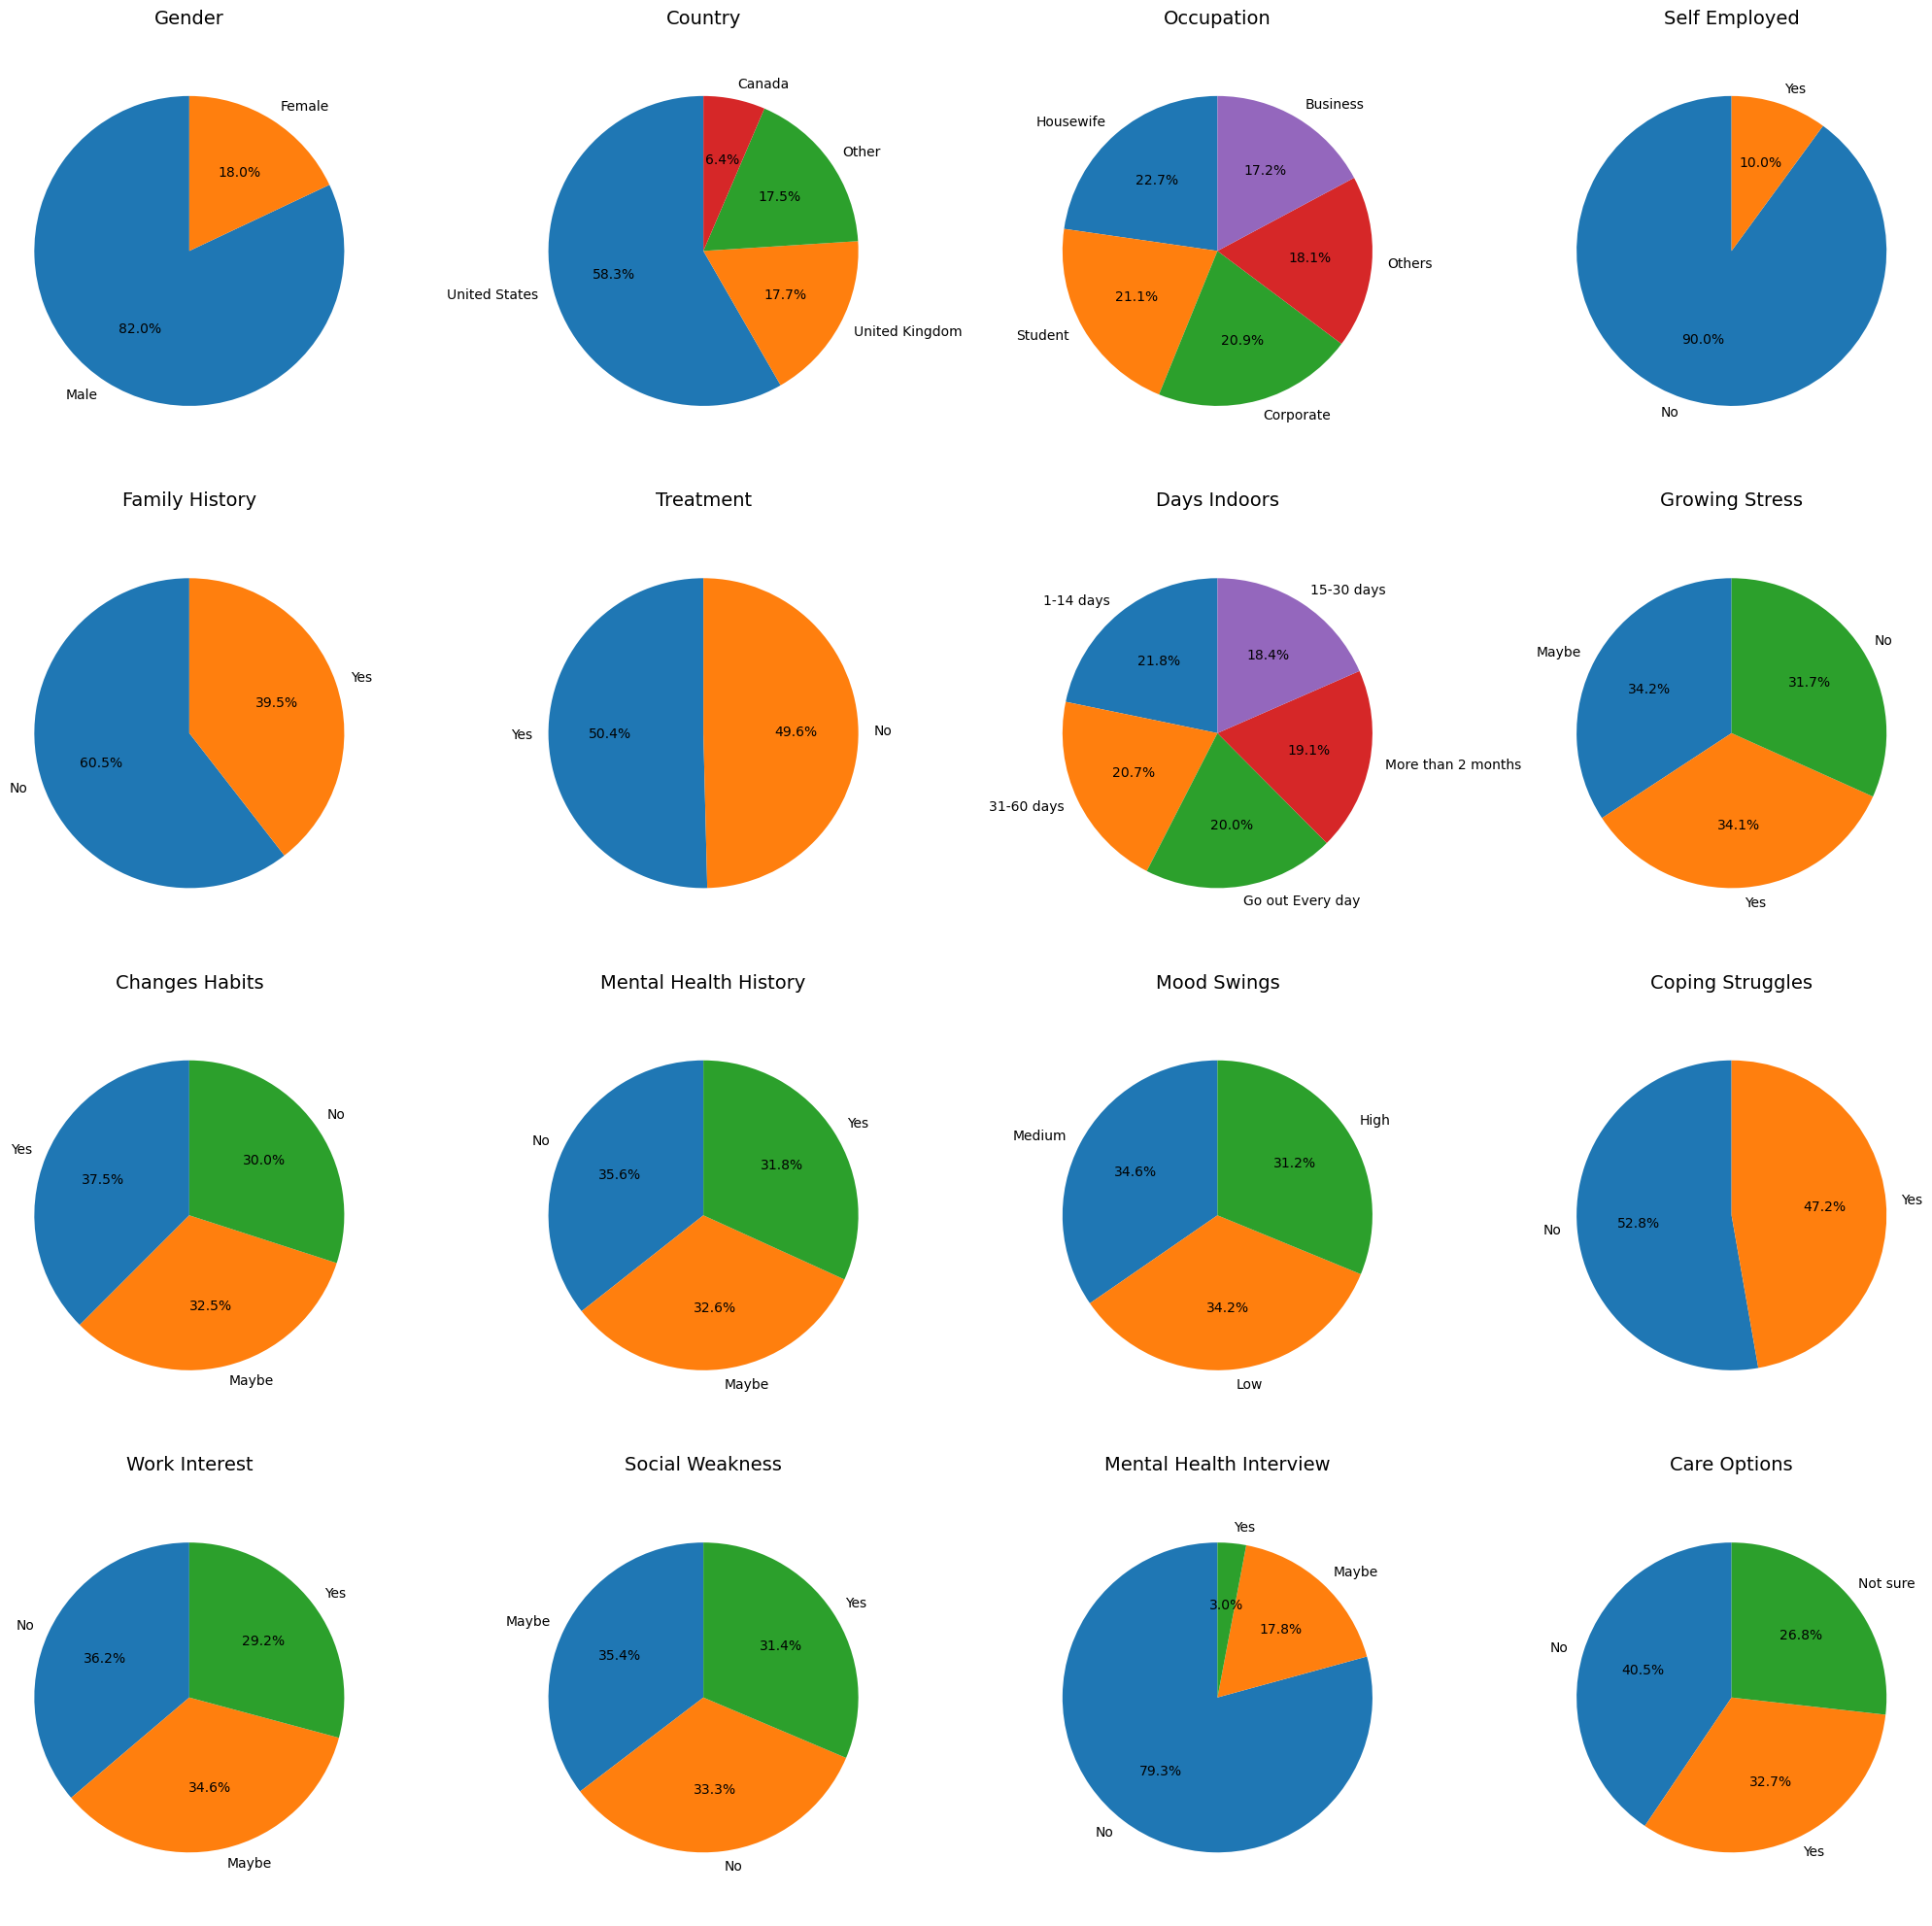

In [35]:
# List of columns to plot (since 'timestamp' is dropped, we don't include it)
columns_to_plot = mental_health.columns

# Modify 'country' column to group all countries except the top 3
def group_top_3_countries(data):
    # Get the value counts of countries and the top 3 countries
    top_3_countries = data['country'].value_counts().nlargest(3).index
    
    # Create a new temporary series with 'Other' for countries not in the top 3
    grouped_countries = data['country'].apply(lambda x: x if x in top_3_countries else 'Other')
    
    return grouped_countries

# Create a new variable that contains the grouped countries
grouped_countries = group_top_3_countries(mental_health)

# Define the number of rows and columns for the grid (4x4)
n_rows = 4
n_cols = 4

# Set up the figure for multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten() 

# Loop through each column and plot a pie chart
for i, column in enumerate(columns_to_plot):
    # Check if the column is 'country' to use the grouped version
    if column == 'country':
        value_counts = grouped_countries.value_counts()
    else:
        # Get value counts for each column
        value_counts = mental_health[column].value_counts()

    # Create a formatted title: title case and without underscores
    title = column.replace('_', ' ').title()
    
    # Create a pie chart in the correct subplot
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{title}', fontsize=14)
    axes[i].axis('equal')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* `Gender Distribution`:

  The dataset is predominantly male (82.0%), with females making up only 18.0% of the respondents.

* `Country Distribution`:

  The majority of respondents are from the United States (58.3%), followed by the United Kingdom (17.7%) and Canada (6.4%). "Other" countries constitute 17.5% of the dataset, making it somewhat diverse but heavily skewed toward these top three countries.

* `Occupation Distribution`:

  The respondents have a broad mix of occupations. The largest groups are "Student" (20.9%), followed by "Housewife" (22.7%), "Corporate" (21.1%), and "Business" (17.2%), showing representation from various fields. An 18.1%  portion falls under "Others"

* `Self-Employment`:

  Only 10% of respondents are self-employed, indicating that most are employed by others (90%).

* `Family History of Mental Health`:

  A significant majority (60.5%) of respondents have no family history of mental health issues, while 39.5% do.

* `Treatment for Mental Health`:

  The dataset is split almost equally between those who have received treatment (50.6%) and those who have not (49.4%). 

* `Time Spent Indoors`:

  Respondents are divided into different groups based on the number of days spent indoors. Most people spend a significant amount of time indoors, with a notable portion (19.1%) being indoors for more than two months.

* `Growing Stress`:

  A large portion of respondents (34.1%) report experiencing growing stress, while 31.7% say they are not, and 34.2% are unsure. Stress seems to be a prominent issue in the population.

* `Changes in Habits`:

  Responses are varied, with 37.5% reporting changes in habits, while 30% did not notice changes. A large "Maybe" group (32.5%) indicates uncertainty.

* `Mental Health History`:

  The responses are split fairly evenly, with 31.8% having a mental health history, 35.6% not, and 32.6% unsure. 

* `Mood Swings`:

  A third of the respondents (34.6%) report medium mood swings, with a fairly even split between those experiencing high and low mood swings, suggesting varying emotional stability within the group.

* `Coping Struggles`:

  Over half of the respondents (52.8%) report not struggling with coping, while 47.2% are experiencing struggles, indicating a substantial portion of the population faces difficulties.

* `Work Interest`:

  The dataset shows mixed levels of work interest, with 29.2% showing interest and a significant portion either unsure (34.6%) or not interested (36.2%).

* `Social Weakness`:

  About one-third of respondents (33.3%) report no social weaknesses, but there is a significant amount of uncertainty (35.4%), with 31.4% confirming struggles in this area.

* `Mental Health Interview`:

  The majority (79.7%) have not undergone a mental health interview, while 17.2% answered "Maybe", and only 3% having done so.

* `Care Options`:

  Respondents are somewhat divided, with 26.8% unsure about care options, 40.5% not having them, and 32.7% having access to care options.

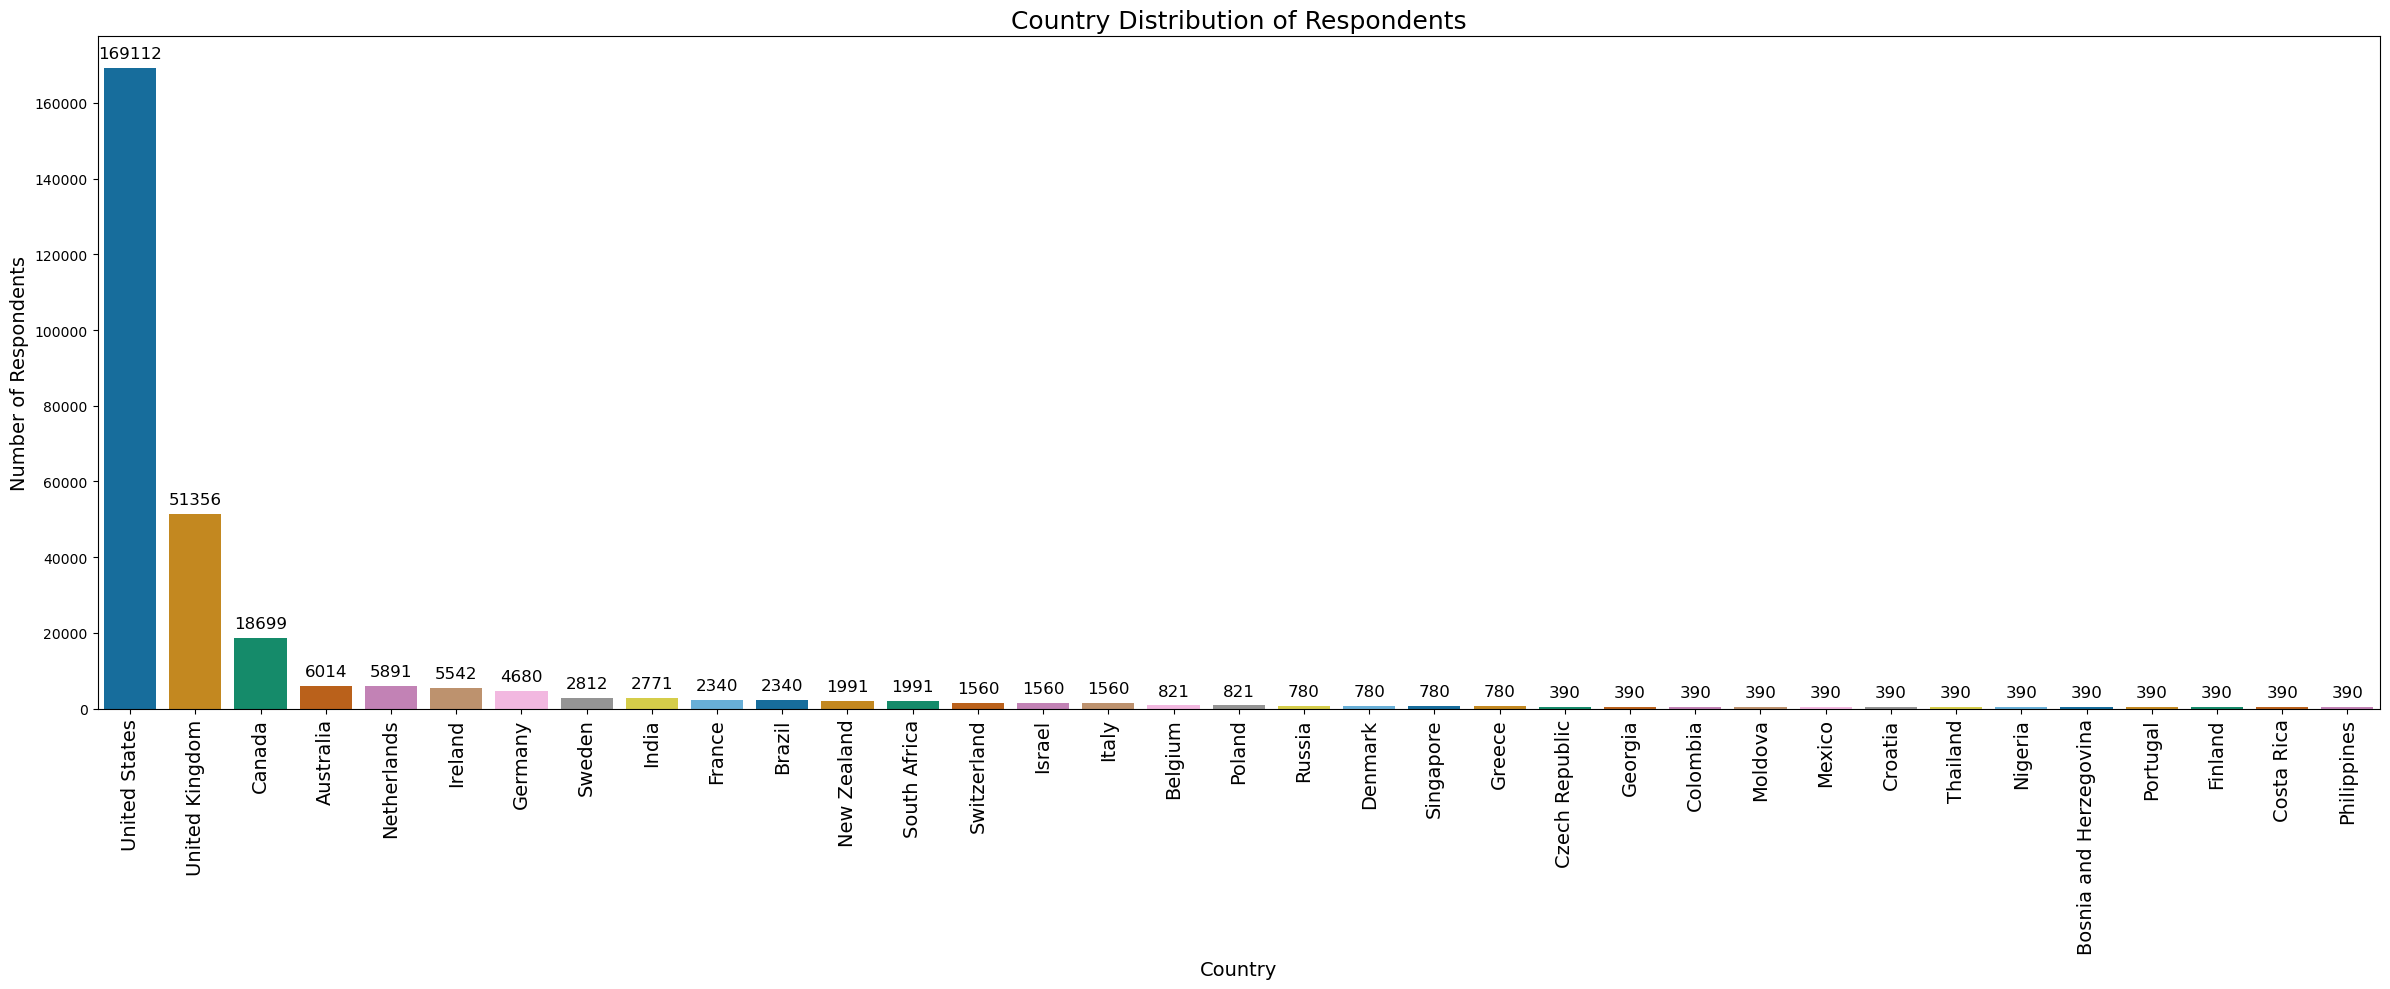

In [37]:
# Count the occurrences of each country
country_counts = mental_health['country'].value_counts()

# Plot the bar chart with a compact layout
plt.figure(figsize=(24, 10))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue = country_counts.index, palette="colorblind")

# Add value counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, fontsize=12)

# Add title and labels
plt.title('Country Distribution of Respondents', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=14)

# Reduce space around the plot
plt.tight_layout()

# Show the plot
plt.show()

#### Stress Factors Analysis <a class="anchor" id="section3_2"></a>

This section focuses on understanding the relationship between growing stress and other variables in the dataset. To gain deeper insights into the factors contributing to stress, two key analytical methods will be applied:

* [Chi-Square Tests and Cross Barplots](#section3_2_1)

#### Chi-Square Tests and Cross Barplots <a class="anchor" id="section3_2_1"></a>

This part explores the association between categorical variables (such as family history, mental health treatment, and coping struggles) and growing stress. Chi-square tests will be used to assess the statistical significance of these relationships, while cross barplots will visually represent the patterns.

Chi-Square Test between growing_stress and gender:
Chi2 Statistic: 946.4203720775255
p-value: 3.0720439382861886e-206
Degrees of Freedom: 2
Expected Frequencies: 
[[17854.08186836 81445.91813164]
 [16537.95015359 75442.04984641]
 [17758.96797805 81012.03202195]]

Cramér's V: 0.057122190926119656 (No/very weak association)

There is a significant association between the variables.



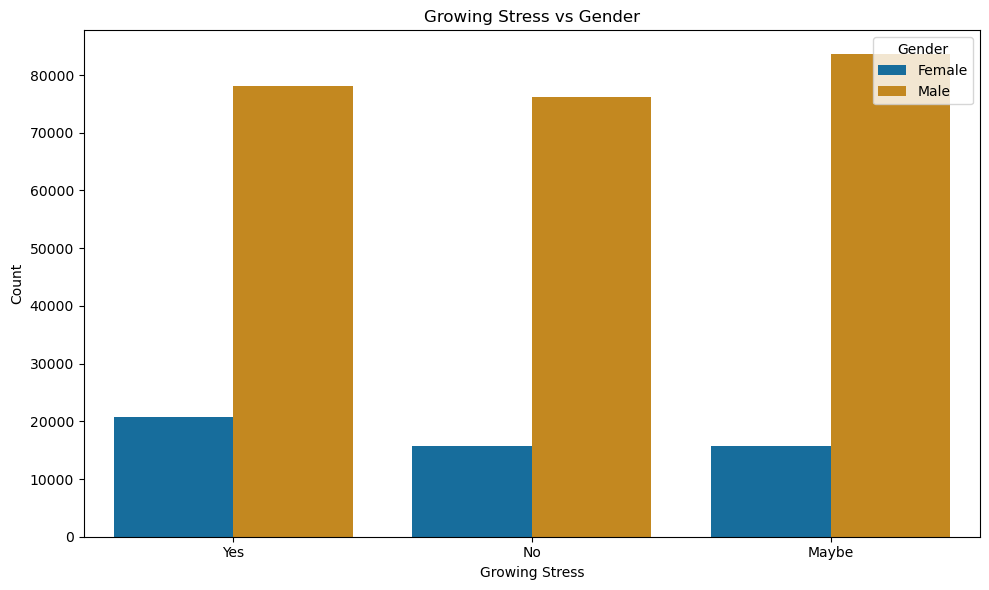

In [40]:
# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Function to interpret Cramér's V value
def interpret_cramers_v(value):
    if value < 0.1:
        return "No/very weak association"
    elif 0.1 <= value < 0.3:
        return "Weak association"
    elif 0.3 <= value < 0.5:
        return "Moderate association"
    else:
        return "Strong association"

# Function to perform Chi-Square test and plot cross barplot
def chi_square_and_barplot(data, col1, col2):
    # Create a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V for effect size
    cramers_v_value = cramers_v(contingency_table)

    # Print the results of the test
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}\n")
    
    # Print Cramér's V value and its interpretation
    cramers_v_interpretation = interpret_cramers_v(cramers_v_value)
    print(f"Cramér's V: {cramers_v_value} ({cramers_v_interpretation})\n")
    
    # Conclusion based on the p-value
    if p < 0.05:
        print("There is a significant association between the variables.\n")
    else:
        print("There is no significant association between the variables.\n")
    
    # Plot cross barplot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col1, hue=col2, palette="colorblind")
    
    # Format the title without underscores, and convert to title case
    plt.title(f'{col1.replace("_", " ").title()} vs {col2.replace("_", " ").title()}')
    plt.xlabel(col1.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.legend(title=col2.replace('_', ' ').title(), loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
# Plot 'growing stress' against 'gender'
chi_square_and_barplot(mental_health, 'growing_stress', 'gender')

The Chi-Square test shows a statistically significant association between growing stress and gender (p-value < 0.05). However, the strength of the association, as indicated by Cramér's V, is very weak (0.057). This suggests that gender has minimal influence on growing stress levels, despite the statistical significance.

In the bar plot, it is evident that males are significantly overrepresented compared to females across all levels of growing stress ("Yes", "No", and "Maybe"). This imbalance likely contributes to the statistical significance but does not indicate a meaningful relationship between gender and stress.

Chi-Square Test between growing_stress and occupation:
Chi2 Statistic: 3542.3748990719646
p-value: 0.0
Degrees of Freedom: 8
Expected Frequencies: 
[[17055.71330559 20775.04266491 22563.15544508 17930.76907165
  20975.31951278]
 [15798.43413744 19243.58936877 20899.88960562 16608.98428207
  19429.10260609]
 [16964.85255696 20664.36796632 22442.9549493  17835.24664628
  20863.57788113]]

Cramér's V: 0.07814389952617017 (No/very weak association)

There is a significant association between the variables.



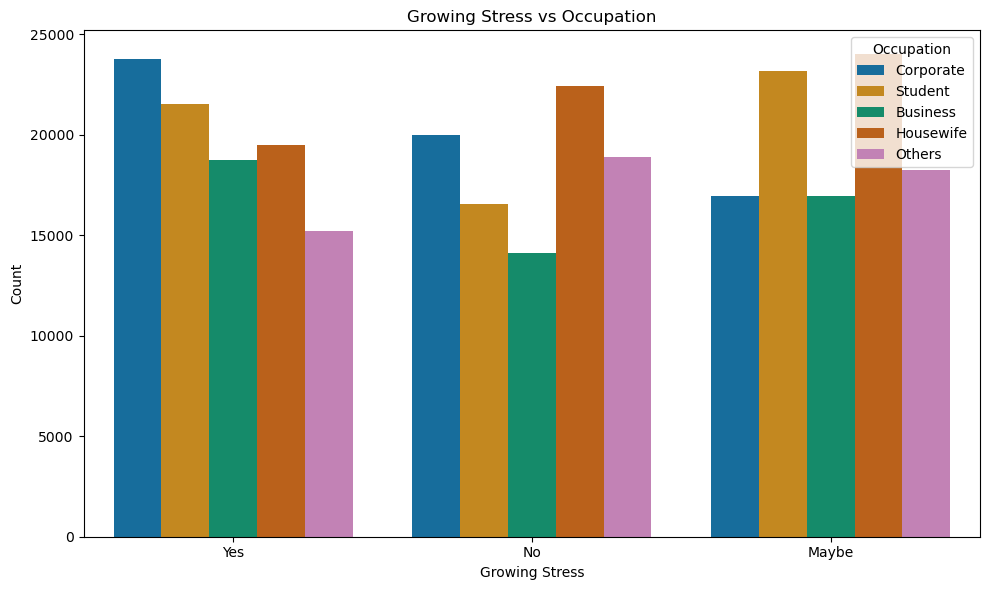

In [42]:
# Plot 'growing stress' against 'occupation'
chi_square_and_barplot(mental_health, 'growing_stress', 'occupation')

The Chi-Square test shows a statistically significant association between growing stress and occupation (p-value = 0.0). However, the strength of the association, as indicated by Cramér's V, is very weak (0.078). This suggests that while occupation might slightly differ across stress categories, the overall effect is minimal.

In the bar plot, different occupations (Corporate, Student, Business, Housewife, Others) appear to be somewhat evenly distributed across the levels of growing stress ("Yes", "No", and "Maybe"). However, no single occupation category stands out as having a strong relationship with growing stress, reinforcing the conclusion of a weak association.

Chi-Square Test between growing_stress and self_employed:
Chi2 Statistic: 4.172724885523379
p-value: 0.12413787414986797
Degrees of Freedom: 2
Expected Frequencies: 
[[89321.42002613  9978.57997387]
 [82737.00114807  9242.99885193]
 [88845.57882579  9925.42117421]]

Cramér's V: 0.003792911351328635 (No/very weak association)

There is no significant association between the variables.



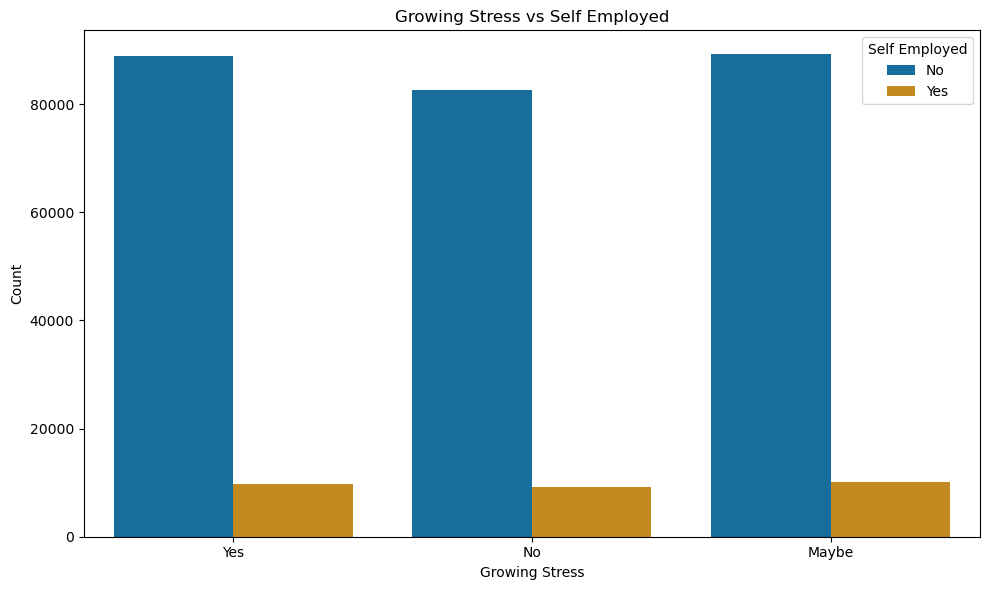

In [44]:
# Plot 'growing stress' against 'self employed'
chi_square_and_barplot(mental_health, 'growing_stress', 'self_employed')

The Chi-Square test shows no statistically significant association between growing stress and self-employment (p-value > 0.05). Additionally, the Cramér's V value of 0.003 indicates a very weak or no association between these variables.

The bar plot clearly shows that the majority of respondents are not self-employed across all categories of growing stress ("Yes", "No", and "Maybe"). The lack of statistical significance and the almost non-existent association suggest that self-employment does not meaningfully affect the level of growing stress in this dataset.

Chi-Square Test between growing_stress and family_history:
Chi2 Statistic: 37.72117485766776
p-value: 6.440965222222116e-09
Degrees of Freedom: 2
Expected Frequencies: 
[[60089.21672396 39210.78327604]
 [55659.67929778 36320.32070222]
 [59769.10397827 39001.89602173]]

Cramér's V: 0.011403953080526847 (No/very weak association)

There is a significant association between the variables.



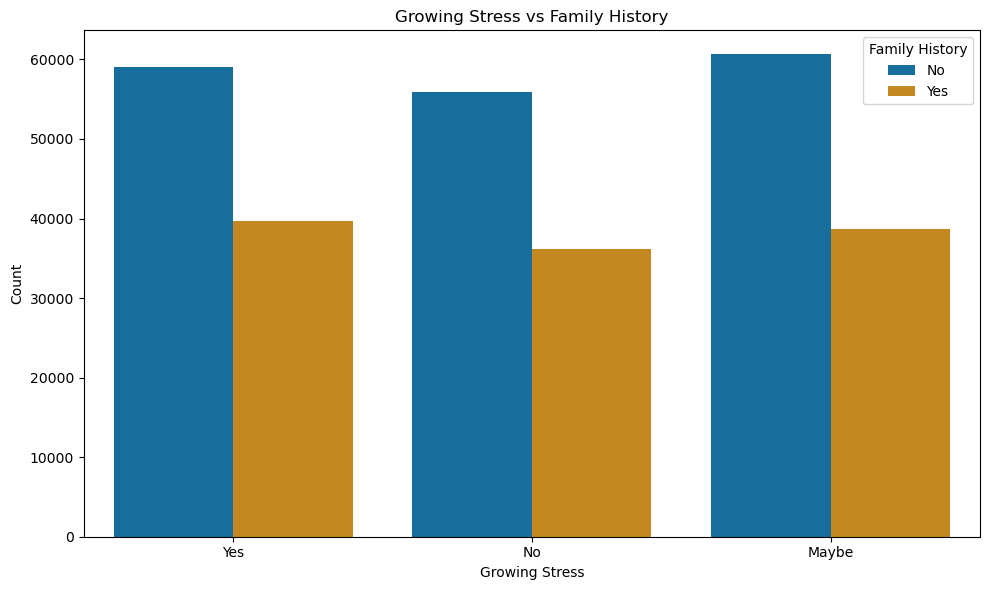

In [46]:
# Plot 'growing stress' against 'family history'
chi_square_and_barplot(mental_health, 'growing_stress', 'family_history')

The Chi-Square test reveals a statistically significant association between growing stress and family history of mental health issues (p-value < 0.05). However, the Cramér's V value of 0.011 indicates an extremely weak association, suggesting that while the relationship is statistically significant, it is practically insignificant in terms of strength.

The bar plot shows that respondents with and without a family history of mental health issues are relatively evenly distributed across all categories of growing stress ("Yes", "No", and "Maybe"). This weakens the meaningfulness of the statistical significance and implies that family history does not play a major role in determining growing stress levels.

Chi-Square Test between growing_stress and treatment:
Chi2 Statistic: 30.030030084298275
p-value: 3.0134349539074016e-07
Degrees of Freedom: 2
Expected Frequencies: 
[[49253.38337051 50046.61662949]
 [45622.62036676 46357.37963324]
 [48990.99626273 49780.00373727]]

Cramér's V: 0.010175147185187429 (No/very weak association)

There is a significant association between the variables.



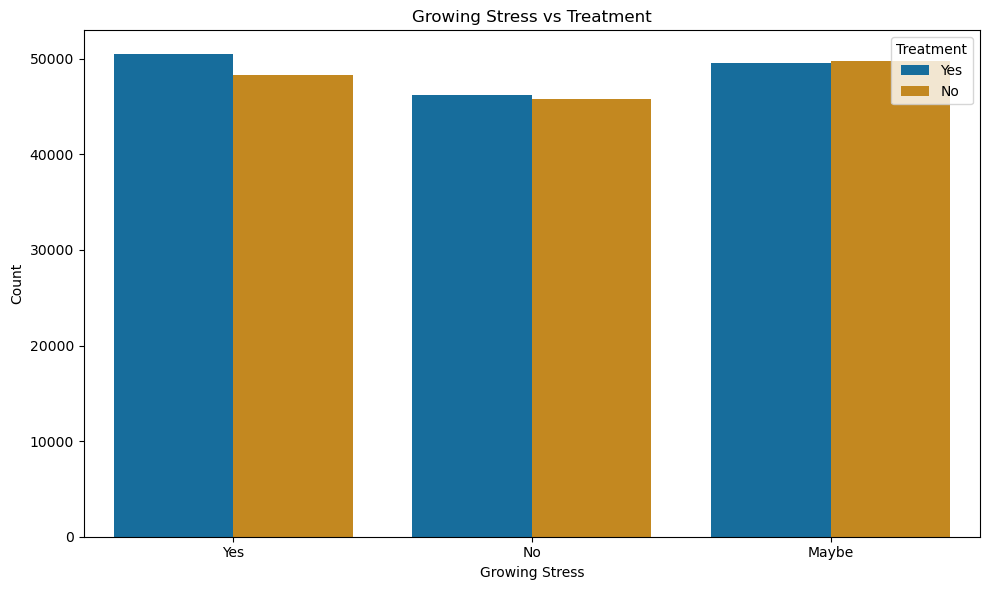

In [48]:
# Plot 'growing stress' against 'treatment'
chi_square_and_barplot(mental_health, 'growing_stress', 'treatment')

The Chi-Square test indicates a statistically significant association between growing stress and whether the respondent has received mental health treatment (p-value < 0.05). However, the Cramér's V value of 0.010 suggests a very weak association, meaning that while there is a statistically significant relationship, the practical importance of this relationship is negligible.

The bar plot shows that the distribution of respondents who have received treatment and those who have not is relatively even across all categories of growing stress ("Yes", "No", and "Maybe"). This further reinforces the weak association, indicating that mental health treatment does not have a meaningful impact on growing stress levels in this dataset.

Chi-Square Test between growing_stress and days_indoors:
Chi2 Statistic: 1971.0834207053242
p-value: 0.0
Degrees of Freedom: 8
Expected Frequencies: 
[[21606.96187912 18307.01566276 20561.0716736  19850.00327529
  18974.94750923]
 [20014.18281613 16957.49547493 19045.39146564 18386.74019397
  17576.19004934]
 [21491.85530476 18209.4888623  20451.53686076 19744.25653075
  18873.86244143]]

Cramér's V: 0.05829084098586357 (No/very weak association)

There is a significant association between the variables.



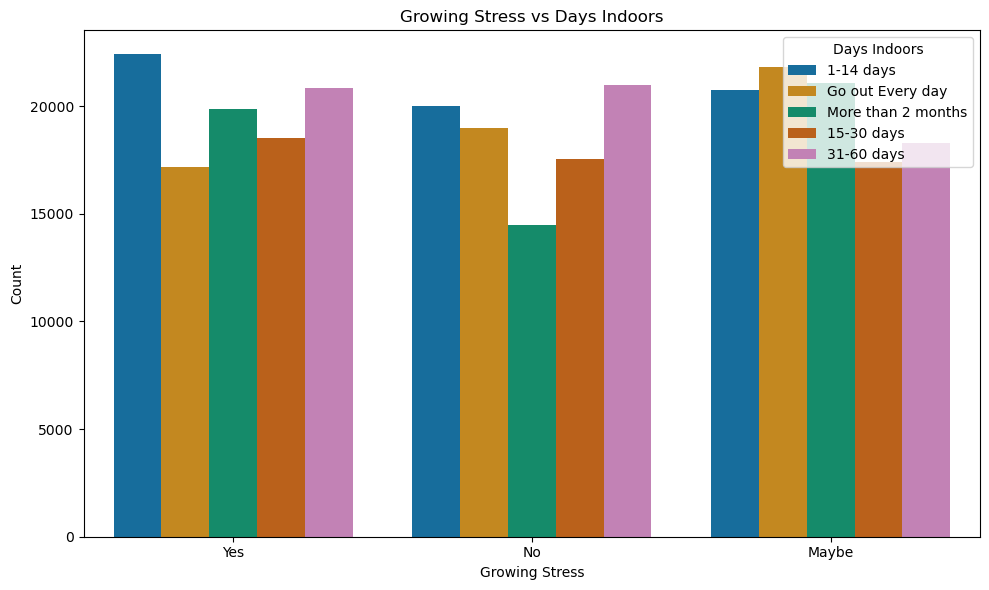

In [50]:
# Plot 'growing stress' against 'days indoors'
chi_square_and_barplot(mental_health, 'growing_stress', 'days_indoors')

The Chi-Square test reveals a statistically significant association between growing stress and the number of days spent indoors (p-value = 0.0). However, the Cramér's V value of 0.058 indicates a very weak association, suggesting that while the relationship exists, its practical significance is minimal.

The bar plot shows that respondents with different indoor habits (such as going out every day, staying indoors for more than 2 months, or spending 15-30 days indoors) are somewhat evenly distributed across the categories of growing stress ("Yes", "No", and "Maybe"). This reinforces the weak association, implying that the amount of time spent indoors does not strongly influence growing stress levels in the dataset.

Chi-Square Test between growing_stress and changes_habits:
Chi2 Statistic: 2379.6029194282296
p-value: 0.0
Degrees of Freedom: 4
Expected Frequencies: 
[[32280.17727917 29775.86079689 37243.96192394]
 [29900.61134076 27580.90308256 34498.48557667]
 [32108.21138007 29617.23612054 37045.55249939]]

Cramér's V: 0.06404718776455122 (No/very weak association)

There is a significant association between the variables.



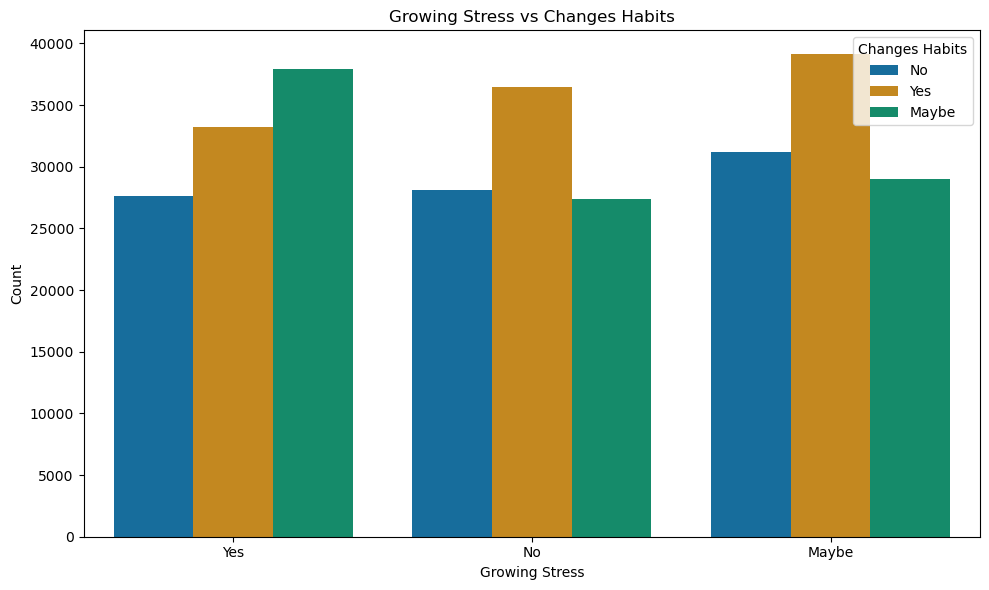

In [52]:
# Plot 'growing stress' against 'changes_habits'
chi_square_and_barplot(mental_health, 'growing_stress', 'changes_habits')

The Chi-Square test shows a statistically significant association between growing stress and changes in habits (p-value = 0.0). However, the Cramér's V value of 0.064 indicates a very weak association, meaning that while there is a statistical relationship, the strength of this relationship is minimal.

The bar plot shows that individuals who reported changes in habits ("Yes", "No", "Maybe") are fairly evenly distributed across all levels of growing stress ("Yes", "No", and "Maybe"). This reinforces the weak association, suggesting that changes in habits have a limited impact on growing stress levels in the dataset.

Chi-Square Test between growing_stress and mental_health_history:
Chi2 Statistic: 293.43383931367106
p-value: 2.8254110148052188e-62
Degrees of Freedom: 4
Expected Frequencies: 
[[32357.89154321 35369.57604008 31572.53241671]
 [29972.59681918 32762.27194528 29245.13123554]
 [32185.51163761 35181.15201465 31404.33634775]]

Cramér's V: 0.02249069709998714 (No/very weak association)

There is a significant association between the variables.



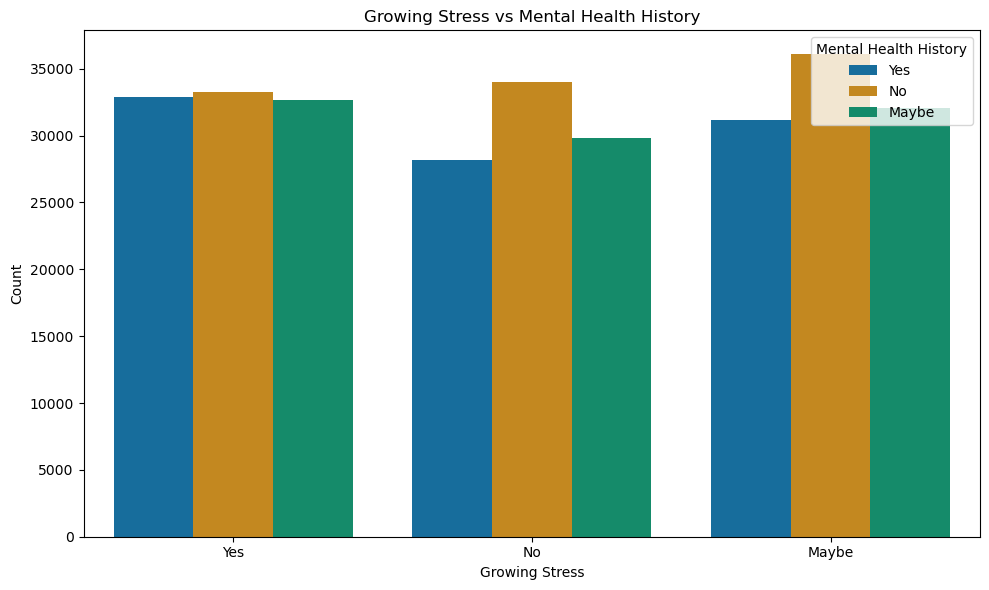

In [54]:
# Plot 'growing stress' against 'mental_health_history'
chi_square_and_barplot(mental_health, 'growing_stress', 'mental_health_history')

The Chi-Square test indicates a statistically significant association between growing stress and respondents' mental health history (p-value < 0.05). However, the Cramér's V value of 0.022 suggests a very weak association, meaning that while there is a statistical relationship, the strength of this relationship is minimal in practice.

The bar plot shows that individuals with varying mental health history ("Yes", "No", "Maybe") are fairly evenly distributed across all levels of growing stress ("Yes", "No", and "Maybe"). This reinforces the conclusion of a weak association, suggesting that having a mental health history does not play a major role in determining growing stress levels in the dataset.

Chi-Square Test between growing_stress and mood_swings:
Chi2 Statistic: 1342.331450552071
p-value: 2.2075239975551e-289
Degrees of Freedom: 4
Expected Frequencies: 
[[30984.02660222 33949.15101137 34366.82238641]
 [28700.00772278 31446.55498516 31833.43729206]
 [30818.965675   33768.29400347 34183.74032153]]

Cramér's V: 0.04810361350814101 (No/very weak association)

There is a significant association between the variables.



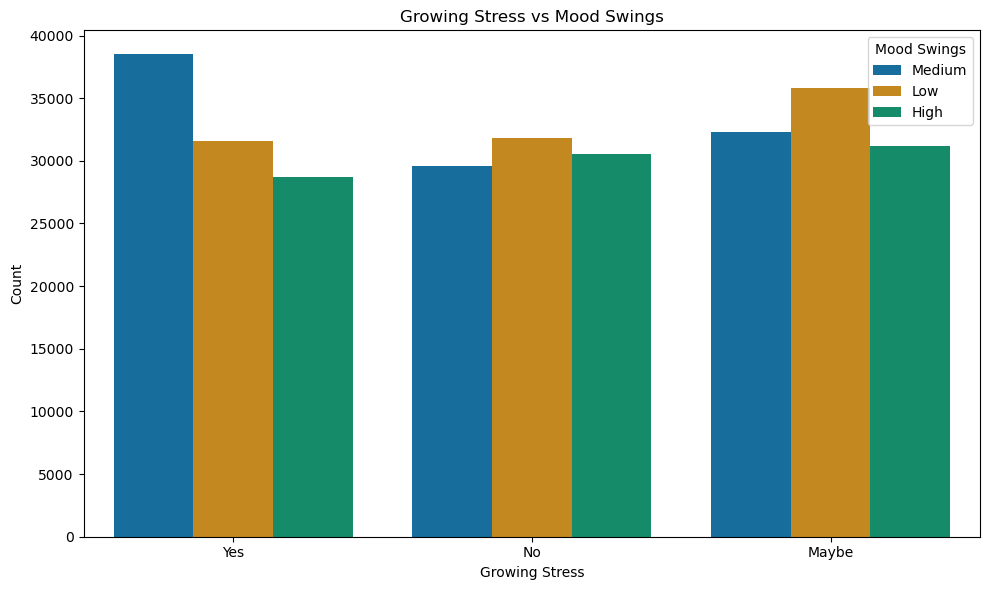

In [56]:
# Plot 'growing stress' against 'mood_swings'
chi_square_and_barplot(mental_health, 'growing_stress', 'mood_swings')

The Chi-Square test indicates a statistically significant association between growing stress and mood swings (p-value < 0.05). However, the Cramér's V value of 0.048 suggests a very weak association, meaning that although there is a statistical relationship, the strength of this relationship is minimal in practical terms.

The bar plot shows that individuals with different levels of mood swings (Low, Medium, High) are relatively evenly distributed across all levels of growing stress ("Yes", "No", and "Maybe"). This suggests that mood swings do not have a strong impact on growing stress levels, reinforcing the weak association observed in the statistical results.

Chi-Square Test between growing_stress and coping_struggles:
Chi2 Statistic: 485.6392231436253
p-value: 3.505763349681448e-106
Degrees of Freedom: 2
Expected Frequencies: 
[[52390.71163347 46909.28836653]
 [48528.67730158 43451.32269842]
 [52111.61106495 46659.38893505]]

Cramér's V: 0.04091849900515122 (No/very weak association)

There is a significant association between the variables.



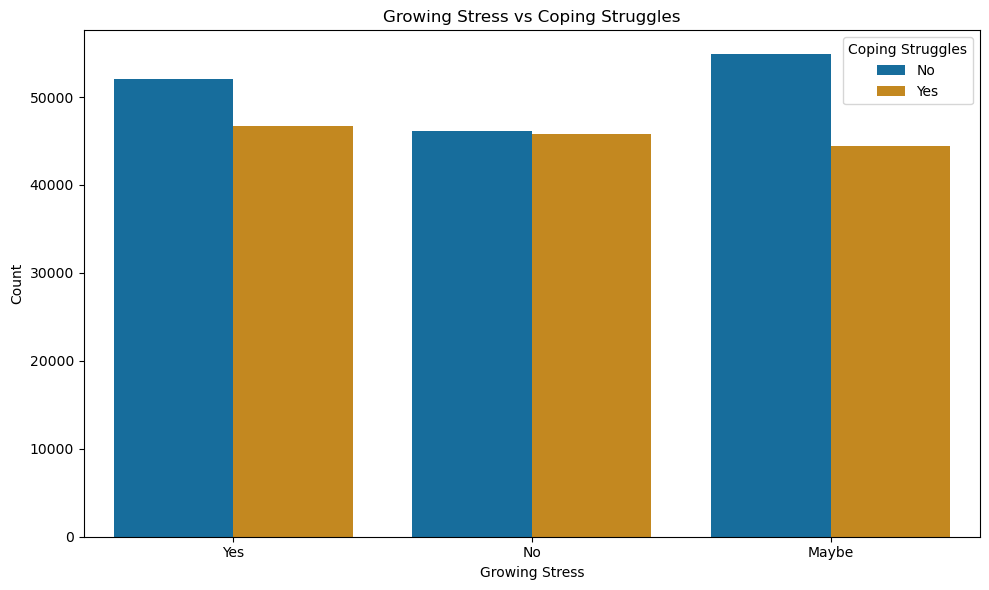

In [58]:
# Plot 'growing stress' against 'coping_struggles'
chi_square_and_barplot(mental_health, 'growing_stress', 'coping_struggles')

The Chi-Square test shows a statistically significant association between growing stress and coping struggles (p-value < 0.05). However, the Cramér's V value of 0.040 indicates a very weak association, meaning that while there is a statistical relationship, the strength of this association is minimal.

The bar plot shows that respondents who struggle with coping ("Yes" and "No") are distributed fairly evenly across all levels of growing stress ("Yes", "No", and "Maybe"). This further supports the weak association, suggesting that while coping struggles are linked to growing stress, the effect is not particularly strong in this dataset.

Chi-Square Test between growing_stress and work_interest:
Chi2 Statistic: 3418.799510378077
p-value: 0.0
Degrees of Freedom: 4
Expected Frequencies: 
[[34366.82238641 35951.23478285 28981.94283074]
 [31833.43729206 33301.05312514 26845.5095828 ]
 [34183.74032153 35759.71209201 28827.54758646]]

Cramér's V: 0.07676877933723675 (No/very weak association)

There is a significant association between the variables.



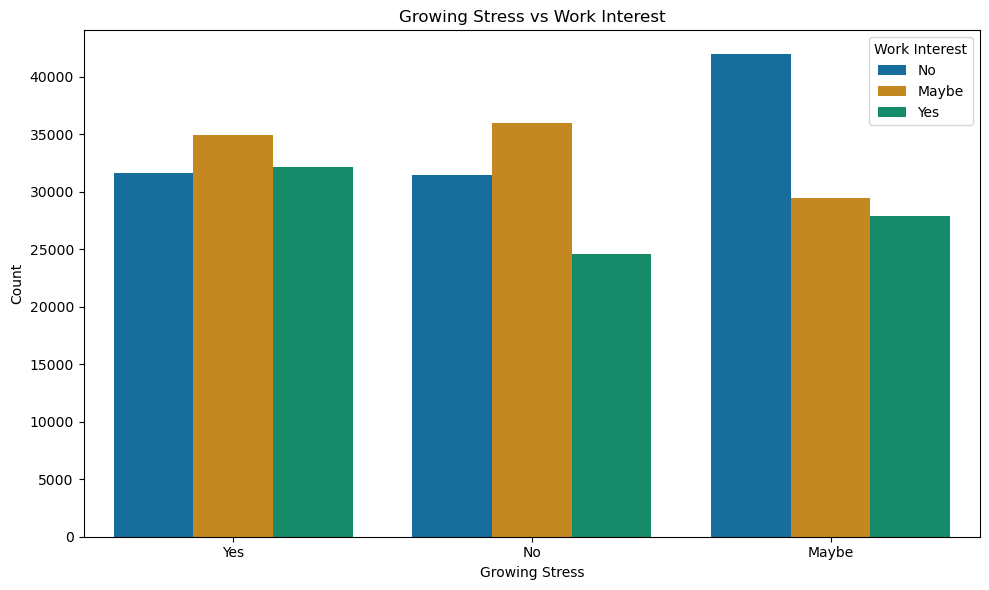

In [60]:
# Plot 'growing stress' against 'work_interest'
chi_square_and_barplot(mental_health, 'growing_stress', 'work_interest')

The Chi-Square test shows a statistically significant association between growing stress and work interest (p-value < 0.05). However, the Cramér's V value of 0.076 indicates a very weak association, suggesting that while there is a statistically significant relationship, the practical strength of this association is minimal.

The bar plot shows that respondents with varying levels of work interest ("Yes", "No", "Maybe") are distributed fairly evenly across all levels of growing stress ("Yes", "No", and "Maybe"). This weak association implies that work interest has only a minimal influence on growing stress levels within this dataset.

Chi-Square Test between growing_stress and social_weakness:
Chi2 Statistic: 556.1867499458822
p-value: 4.691711759169606e-119
Degrees of Freedom: 4
Expected Frequencies: 
[[35117.60380071 33029.24692554 31153.14927375]
 [32528.87409456 30594.46256003 28856.66334541]
 [34930.52210473 32853.29051443 30987.18738084]]

Cramér's V: 0.03096407693328781 (No/very weak association)

There is a significant association between the variables.



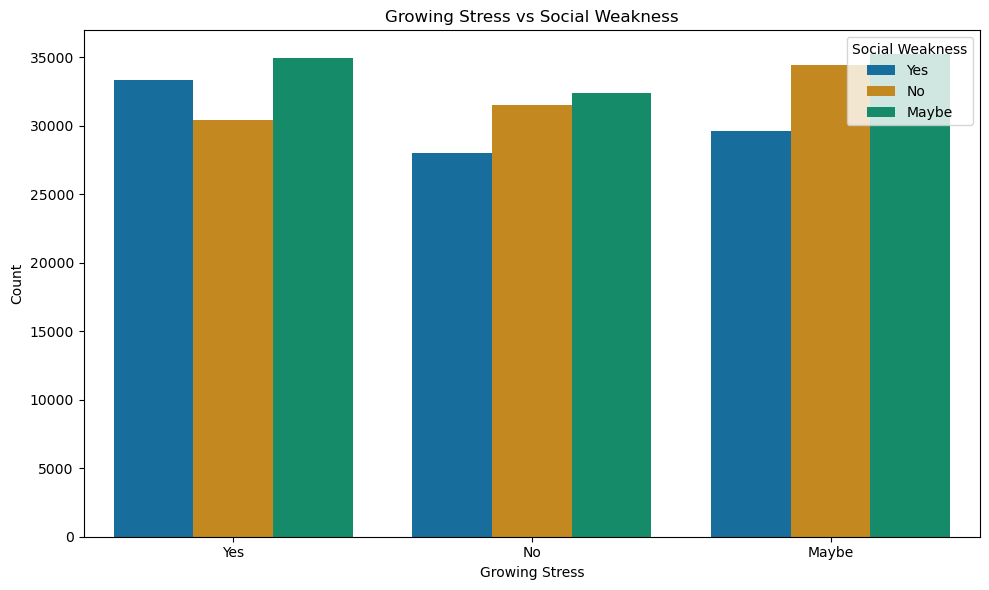

In [62]:
# Plot 'growing stress' against 'social_weakness'
chi_square_and_barplot(mental_health, 'growing_stress', 'social_weakness')

The Chi-Square test indicates a statistically significant association between growing stress and social weakness (p-value < 0.05). However, the Cramér's V value of 0.030 suggests a very weak association, meaning that while the relationship exists, it is of minimal practical importance.

The bar plot shows that respondents with varying levels of social weakness ("Yes", "No", "Maybe") are fairly evenly distributed across all levels of growing stress ("Yes", "No", and "Maybe"). This reinforces the weak association, indicating that social weakness does not have a strong effect on growing stress levels in this dataset.

Chi-Square Test between growing_stress and mental_health_interview:
Chi2 Statistic: 15.075044919226393
p-value: 0.004548073219184747
Degrees of Freedom: 4
Expected Frequencies: 
[[17645.24618084 78703.32355344  2951.43026571]
 [16344.50900014 72901.62840328  2733.86259658]
 [17551.24481901 78284.04804328  2935.70713771]]

Cramér's V: 0.005097733481620504 (No/very weak association)

There is a significant association between the variables.



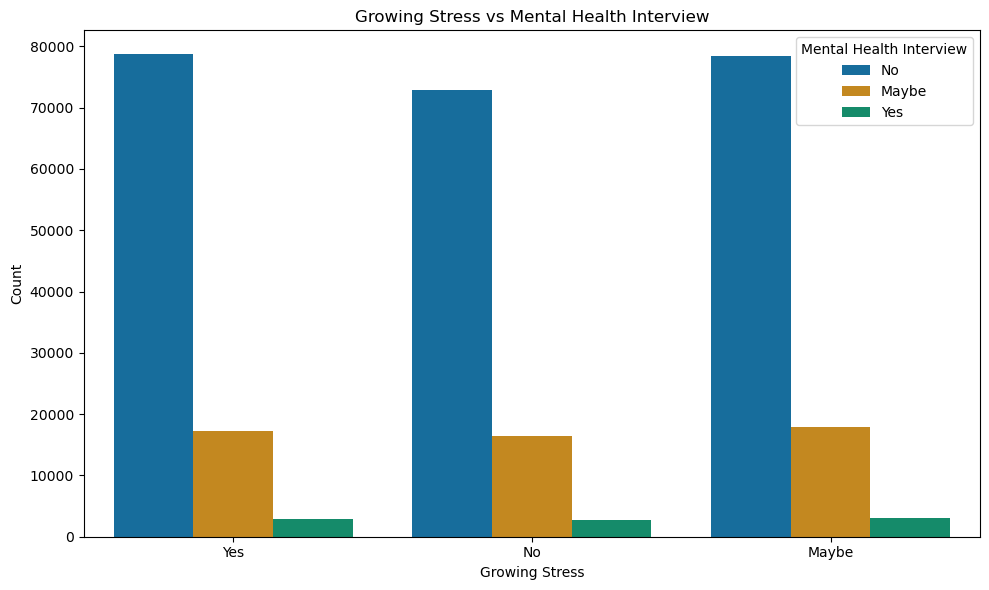

In [64]:
# Plot 'growing stress' against 'mental_health_interview'
chi_square_and_barplot(mental_health, 'growing_stress', 'mental_health_interview')

The Chi-Square test shows a statistically significant association between growing stress and whether a respondent has had a mental health interview (p-value < 0.05). However, the Cramér's V value of 0.0059 suggests a very weak association, indicating that while the relationship is statistically significant, it is of minimal practical importance.

The bar plot demonstrates that respondents who have not had a mental health interview are the overwhelming majority across all levels of growing stress ("Yes", "No", and "Maybe"). This reinforces the weak association observed in the statistical analysis, showing that having a mental health interview does not strongly influence growing stress levels in the dataset.

Chi-Square Test between growing_stress and care_options:
Chi2 Statistic: 13.343354437968745
p-value: 0.009714438890052513
Degrees of Freedom: 4
Expected Frequencies: 
[[40265.5746748  26583.41360657 32451.01171863]
 [37297.35708548 24623.7903679  30058.85254662]
 [40051.06823972 26441.79602553 32278.13573475]]

Cramér's V: 0.004796012758577465 (No/very weak association)

There is a significant association between the variables.



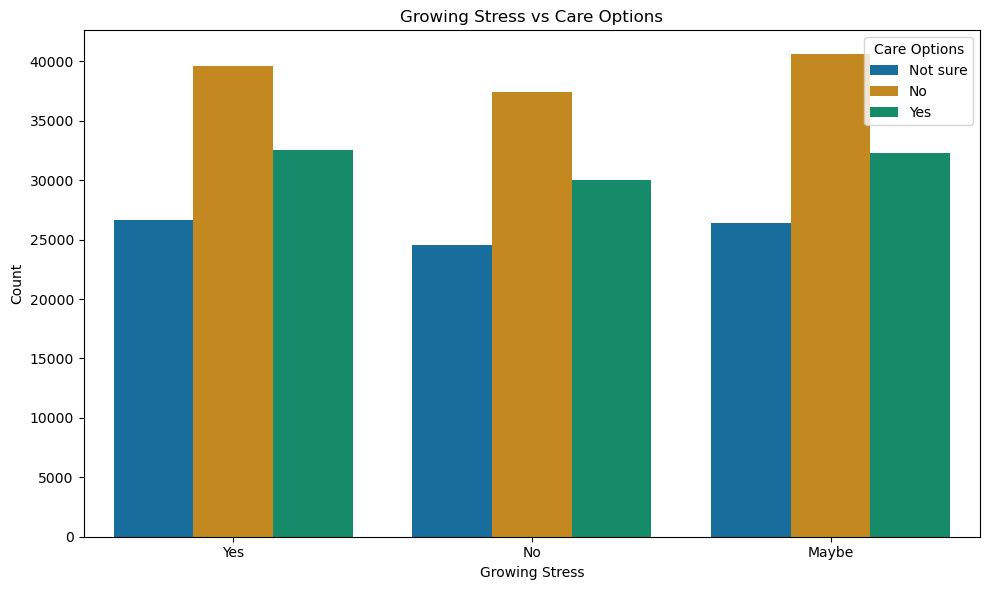

In [66]:
# Plot 'growing stress' against 'care_options'
chi_square_and_barplot(mental_health, 'growing_stress', 'care_options')

The Chi-Square test indicates a statistically significant association between growing stress and awareness of care options (p-value < 0.05). However, the Cramér's V value of 0.0048 suggests a very weak association, meaning that while the relationship is statistically significant, it has very little practical significance.

The bar plot shows that respondents who are unsure about care options, those who have no access, and those with access to care options are relatively evenly distributed across all levels of growing stress ("Yes", "No", and "Maybe"). This weak association suggests that awareness or availability of care options does not strongly impact growing stress levels within this dataset.

### Conclusion <a class="anchor" id="conclusion"></a>

**Findings Overview**
* The analysis reveals significant but **weak associations** between **growing stress** and a variety of factors, including **gender, occupation, family history, mental health treatment, and coping struggles**. Although statistically significant, these associations have minimal practical significance, as indicated by the low Cramér’s V values across the board.
* **Self-employment** shows no significant relationship with growing stress, suggesting that employment type does not impact stress levels in this dataset.
* Variables such as **mental health history**, **mood swings**, and **social weakness** are weakly associated with growing stress. These findings suggest that while these factors may relate to stress, they are not strong predictors within this sample.
* **Days spent indoors** and **changes in habits** have minimal influence on growing stress levels, despite showing statistical significance. The effect sizes are too weak to indicate a meaningful relationship.
* Access to **mental health interviews** and **care options** does not strongly affect growing stress levels, pointing to the limited role these factors play in mitigating or exacerbating stress within the respondents.

**Next Steps**
* Conduct further analyses to investigate possible interactions between variables (e.g., the combined effects of gender, occupation, and mental health treatment) to identify any nuanced patterns that might not be visible in individual analyses.
* Explore other potential contributors to stress, such as external environmental factors (e.g., socioeconomic status, geographical location) or personal lifestyle habits (e.g., exercise, diet), which were not considered in the current dataset.
* Integrate qualitative data to complement the quantitative findings, potentially offering deeper insights into why certain factors have weak associations with stress, despite being statistically significant.
* Conduct longitudinal studies to examine how stress levels evolve over time and how interventions, such as therapy or lifestyle changes, impact growing stress in the long term.
